In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

### Loading Dataset
First, let's load in the dataset we are going to explore. The dataset was originally obtained from [Kaggle](https://www.kaggle.com/datasets/zsinghrahulk/india-crop-yield/data). For ease of access, we have uploaded the dataset to our GitHub repository.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/xgui17/CSE151A/main/Crop_Production_Statistics.csv?token=GHSAT0AAAAAACMOI3L2P4DZS7USZMHEXPTEZN6UK5A')
crop_data = data.copy()

We noticed that some of the column names are not in a cleaned format, so let's rename them.

In [3]:
crop_data = crop_data.rename(columns={'District ':'District', 'Area ':'Area'})

Now, let us take a look at the first five rows of `crop_data`.

In [4]:
crop_data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


## EDA

### Number of observations

In [5]:
# number of observations
number_observations = crop_data.shape[0]
number_observations

345336


There are 345,336 observations in our `crop_data`.

### Column Description
Then, let's take a look at the columns in our dataset.

In [6]:
print(crop_data.columns)

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield'],
      dtype='object')


In [7]:
categorial_col, numeric_col = ['State', 'District', 'Crop', 'Crop_Year', 'Season'], ['Area',
       'Production', 'Yield']

By looking through each column, we could see that there are 5 categorical columns which include `State`, `Distirct`, `Crop`, `Season`. Although `Crop_Year` is stored numerically here, it is actually a categorical variable. There are 3 numerical columns: `Area`, `Production`, and `Yield`.


* `State`: This column indicates the state in India where the crop yield is being measured. Each entry represents a specific state, providing geographical context for the crop yield data.
* `District`: This specifies the district within the state where the crop is located. Districts are smaller administrative divisions within a state, and this detail allows for more localized analysis of crop yields.
* `Crop`: This column names the specific crop grown in the field. It identifies whether the field contains wheat, rice, corn, etc., enabling the differentiation and analysis of yields based on the type of crop.
* `Crop_Year`: The year in which the crop is harvested or yielded is recorded here. This temporal information is crucial for understanding crop yield trends over time and for making year-on-year comparisons.
* `Season`: The season column categorizes the cultivation period of the crops into different agricultural seasons typical in India. The top two seasons are Kharif and Rabi. Kharif Season means that crops sown at the beginning of the monsoon season and harvested at the end of the monsoon season, around the start of winter. Rabi Season means that crops sown at the beginning of winter and harvested by the end of the winter season, around the start of the summer.
* `Area`: The area column measures the size of the crop field. This gives an idea of the scale of cultivation for each crop in each observation.
* `Production`: This represents the total production from the crop field during the specified season. It is generally measured in weight (like kilograms or tonnes) and provides a quantitative measure of the output.
* `Yield`: This is a calculated column representing the production per unit area for that specific observation. It is obtained by dividing the total production by the area of the crop field. Yield is a key metric for assessing the efficiency and effectiveness of agricultural practices.

### Missing Data

In [8]:
crop_data.isna().sum()/crop_data.shape[0]

State         0.000000
District      0.000000
Crop          0.000026
Crop_Year     0.000000
Season        0.000000
Area          0.000000
Production    0.014328
Yield         0.000000
dtype: float64

We could see that most of the missing values come from the `Production` column. There are a few missing values in `Crop` and all other columns do not contain `np.nan` values.


### Data Distribution
To have a better understanding of how each column looks like, let us explore the distribution of values in each column.

In [9]:
crop_data.describe()

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


There is no negative value in any of the numeric columns.

Next, let's look at the number of unqiue values in the discrete columns.

In [10]:
# number of unique values in discrete variables
crop_data.iloc[:,:5].nunique()

State         37
District     707
Crop          55
Crop_Year     24
Season         6
dtype: int64

There are 37 unique states, 707 unique districts, 55 different kind of crops, 24 years on record, and 6 different season category.

Now we'll take a closer look at our discrete columns by examining the percentages of the top five values in each column.

In [11]:
# distribution of State
distribution_dict = {}
for col in categorial_col:
  distribution_dict[col] = crop_data[col].value_counts(normalize=True)[:5]
distribution_dict

{'State': Uttar Pradesh     0.129674
 Madhya Pradesh    0.086600
 Karnataka         0.079612
 Bihar             0.071516
 Rajasthan         0.058966
 Name: State, dtype: float64,
 'District': BILASPUR      0.003602
 BELAGAVI      0.003466
 TUMAKURU      0.003402
 AURANGABAD    0.003371
 DAVANGERE     0.003333
 Name: District, dtype: float64,
 'Crop': Rice                 0.062581
 Maize                0.059402
 Moong(Green Gram)    0.043840
 Urad                 0.042224
 Sesamum              0.037787
 Name: Crop, dtype: float64,
 'Crop_Year': 2019    0.055783
 2018    0.052995
 2017    0.052146
 2016    0.050432
 2015    0.047313
 Name: Crop_Year, dtype: float64,
 'Season': Kharif         0.400679
 Rabi           0.292327
 Whole Year     0.198879
 Summer         0.063990
 Winter         0.023887
 Name: Season, dtype: float64}

In our analysis, we also identified outliers in the area and production data. However, we recognized these outliers as reasonable due to the direct correlation between larger cultivation areas and greater production. This relationship is expected in agricultural contexts, suggesting the outliers reflect true variations in farming scale rather than errors. Therefore, we decided to retain these data points, believing they accurately represent real-world agricultural practices without skewing our analysis.


## Preprocessing

Since only about 1.4% of the rows contains null values, we decide to drop these rows directly.

In [12]:
crop_data.shape

(345336, 8)

In [13]:
crop_data = crop_data.dropna()

In [14]:
crop_data.shape

(340383, 8)

Now let's take a look at the distribution of `Area` and `Production` to determine how should we preprocess our data to better assist building our model.

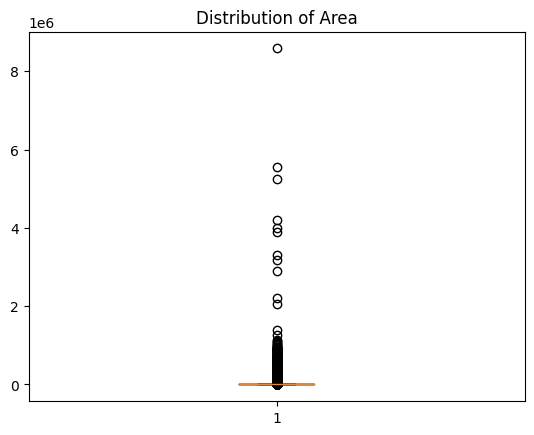

In [15]:
plt.boxplot(crop_data['Area'])
plt.title('Distribution of Area')
plt.show()

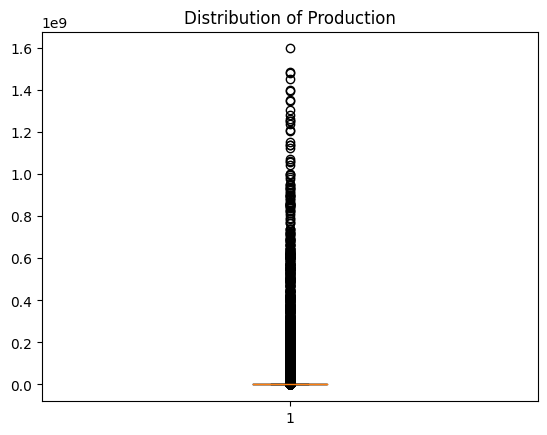

In [16]:
plt.boxplot(crop_data['Production'])
plt.title('Distribution of Production')
plt.show()

### Normalize the `Area` column

In [17]:
# Normalizing the area column
sc = MinMaxScaler()
crop_data['Area'] = sc.fit_transform(crop_data[['Area']])
crop_data.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,0.000284,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,0.000190,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,0.000483,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,0.000483,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,0.000484,3120.0,0.75


### Log transform the `Production` column

We noticed that are some very large but reasonable values in the `Production` column. To reduce the scale of the data in this column and to make it easier to handle, we decide to log-transform the `Production` column.

In [18]:
crop_data['Production'] = np.log(crop_data['Production'] )
crop_data.head()

/Users/gxy/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,0.000284,8.135933,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,0.000190,7.730614,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,0.000483,8.026170,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,0.000483,7.886081,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,0.000484,8.045588,0.75


### One-hot Encoding
Since `Crop`, `Season`, `State`, `District` and `Crop_Year` are categorical variables, we will perform one-hot encoding on these columns.

In [19]:
preprocessed_crop_data = pd.get_dummies(crop_data, columns = ['State', 'Crop', 'Season', 'District', 'Crop_Year'])

One thing to note is that there are 707 unique `District` in the original data. Even though we include all 707 of them in the one-hot encoded dataset now, we may aggregate some minor categories into one "other_district" category to reduce the computation burden.

Our dataset `preprocessed_crop_data` now looks like the following:

In [20]:
preprocessed_crop_data.head()

,Area,Production,Yield,State_Andaman and Nicobar Island,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_CHANDIGARH,State_Chhattisgarh,...,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Crop_Year_2016,Crop_Year_2017,Crop_Year_2018,Crop_Year_2019,Crop_Year_2020
0,0.000284,8.135933,1.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000190,7.730614,1.40,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000483,8.026170,0.74,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000483,7.886081,0.64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000484,8.045588,0.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualization

### A rough first glance of the data by plotting the yearly production trend and distribution of crops (top 20)

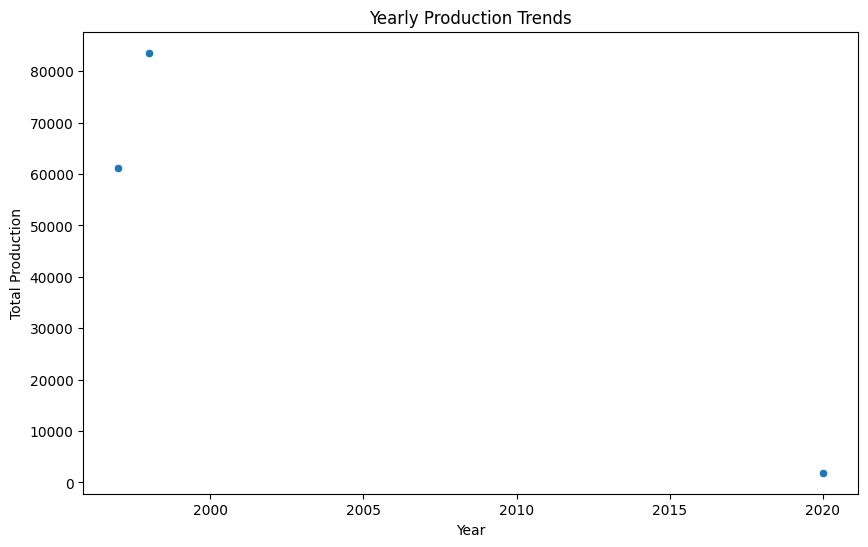

In [21]:
# Aggregate production by year
yearly_production = crop_data.groupby('Crop_Year')['Production'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearly_production, x='Crop_Year', y='Production')
plt.title('Yearly Production Trends')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

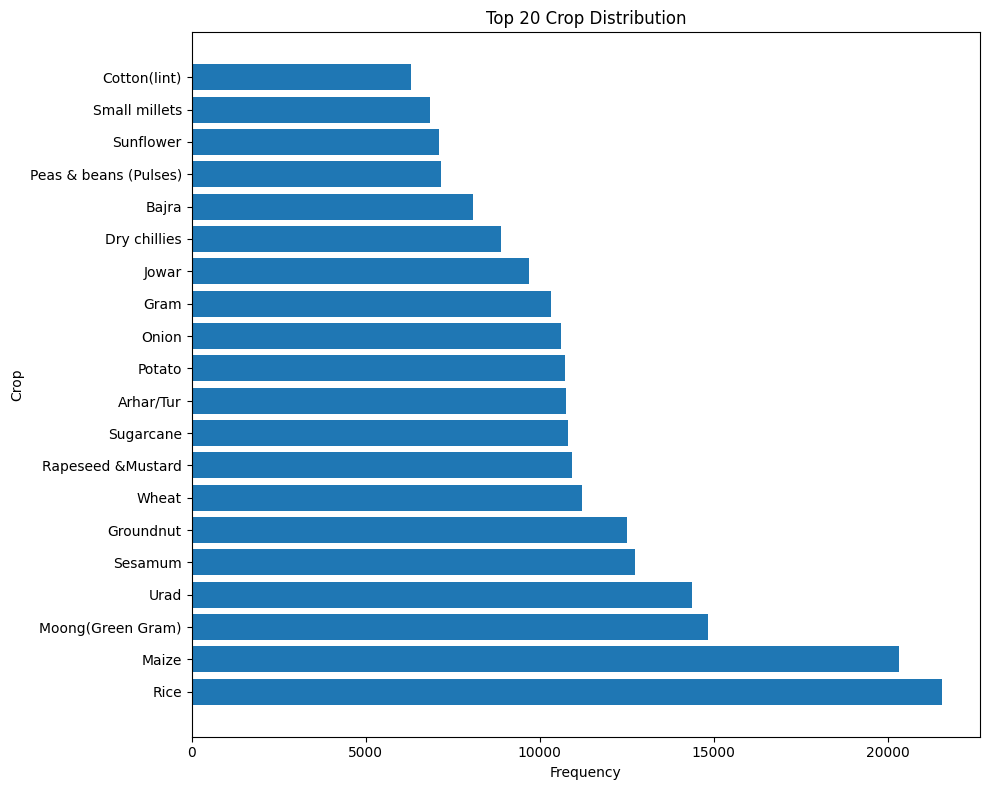

In [22]:
top_n = 20

# You could use the entire dataset or just the top N as in the previous example
crop_counts = crop_data['Crop'].value_counts().head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(crop_counts.index, crop_counts.values)
plt.title('Top 20 Crop Distribution')
plt.xlabel('Frequency')
plt.ylabel('Crop')
plt.tight_layout()  # Adjust the layout
plt.show()

### Visualization showing the moderate relationship between Area(normalized) and Production(logged) without outliers.

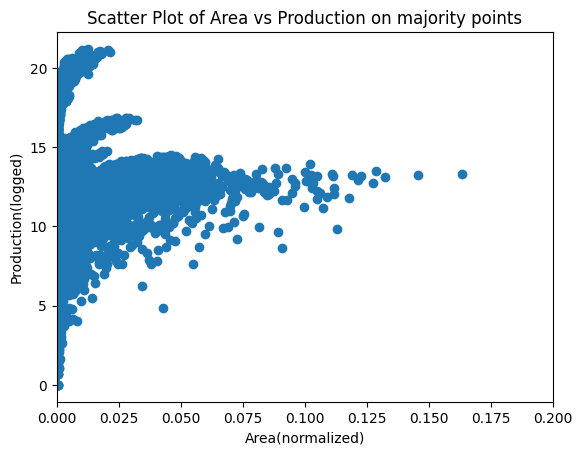

In [23]:
# Area and Production relationship on majority points
plt.scatter(crop_data['Area'], crop_data['Production'])
plt.xlim([0.0, 0.2]) 
plt.xlabel('Area(normalized)')
plt.ylabel('Production(logged)')
plt.title('Scatter Plot of Area vs Production on majority points')
plt.show()

### Visualization showing the relationship between Area(normalized) and Production(logged) on outliers.
The graph below shows the relationship between the logged production and normalized area for the outliers in `Area`.For these outliers, there is a moderate correlation between the `Production` and `Area` values.

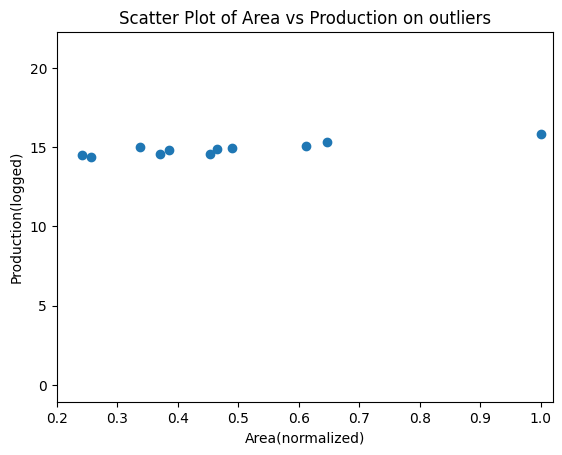

In [24]:
# Area and Production relationship on outliers
plt.scatter(crop_data['Area'], crop_data['Production'])
plt.xlim([0.2, 1.02]) 
plt.xlabel('Area(normalized)')
plt.ylabel('Production(logged)')
plt.title('Scatter Plot of Area vs Production on outliers')
plt.show()

### Visualization of a comparison of crop production

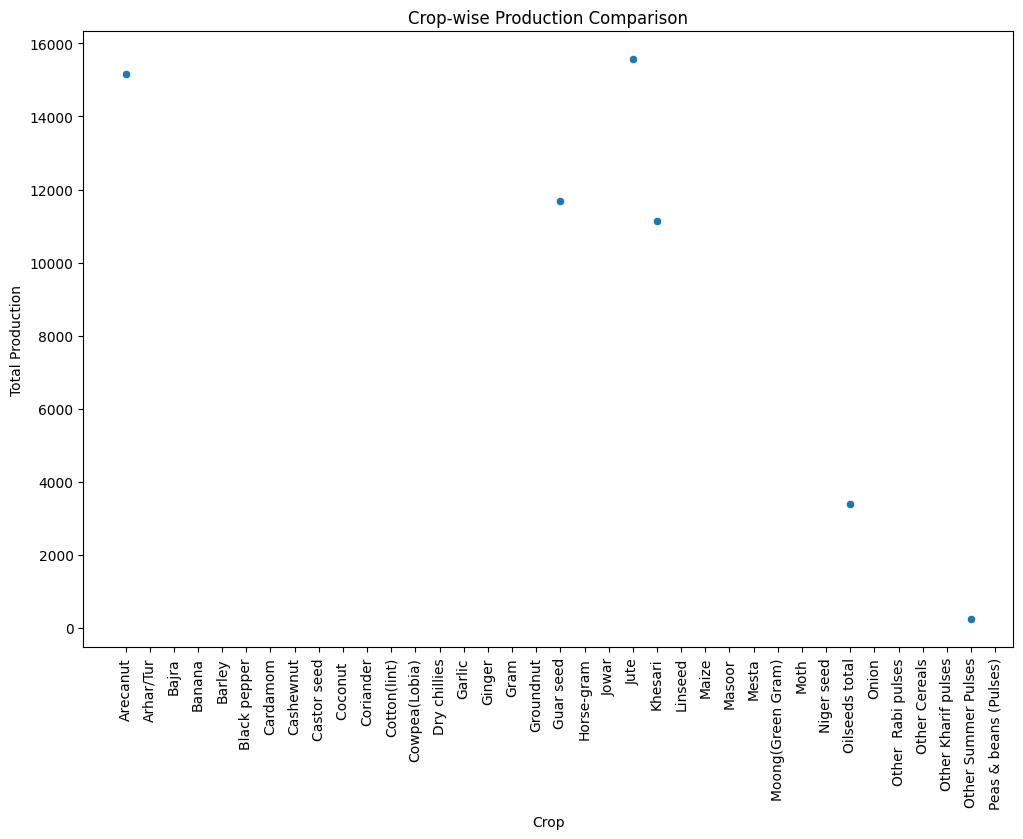

In [25]:
# Aggregate production by crop
crop_production = crop_data.groupby('Crop')['Production'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=crop_production, x='Crop', y='Production')
plt.title('Crop-wise Production Comparison')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.ylim = ([0, 200000])
plt.xticks(rotation=90)  # Rotate crop names for better readability
plt.show()

### Scatter Plot of a comparison of seaonsal variation in crop production

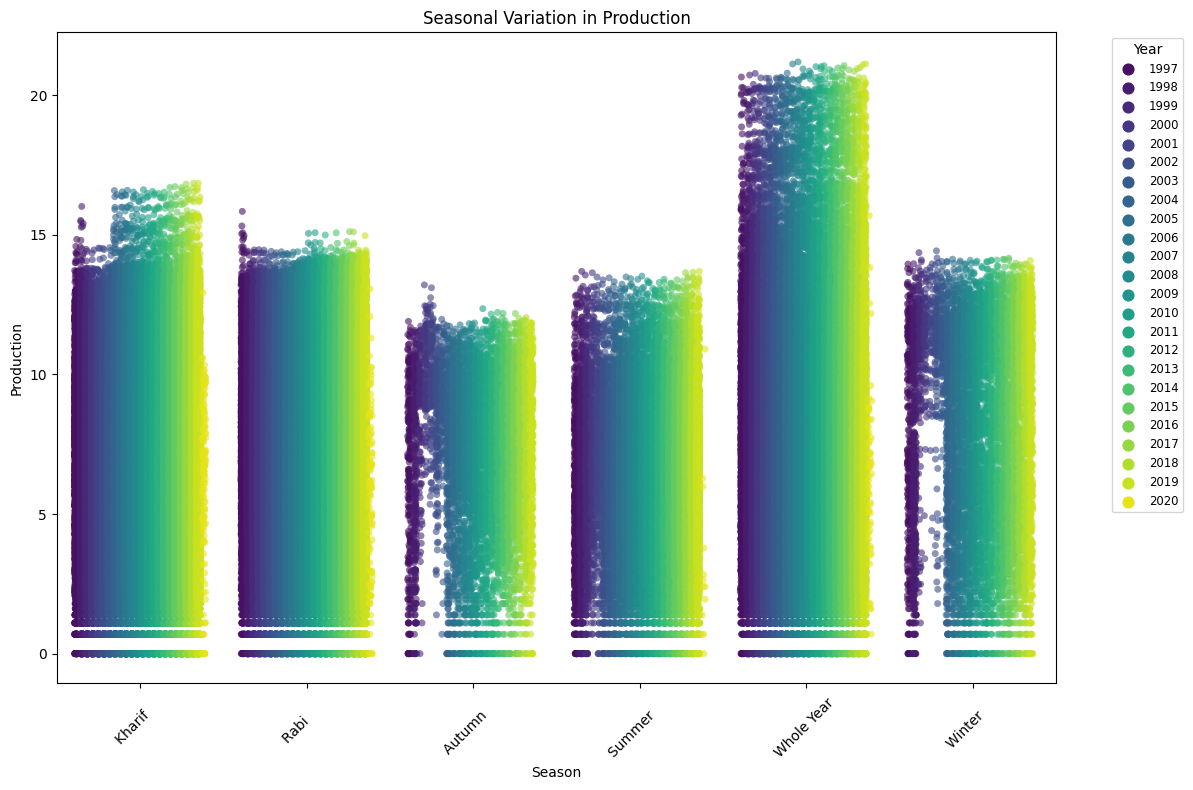

In [26]:
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility

# Use stripplot to add jitter to the 'Season' category
ax = sns.stripplot(data=crop_data, x='Season', y='Production', hue='Crop_Year', 
                   palette='viridis', size=5, jitter=0.25, dodge=True, alpha=0.6)

# Since stripplot doesn't create a legend, we'll make one manually
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.title('Seasonal Variation in Production')
plt.xlabel('Season')
plt.ylabel('Production')
plt.xticks(rotation=45)  # Rotate season names for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

### Visualization showing median values of log transformed production in each season

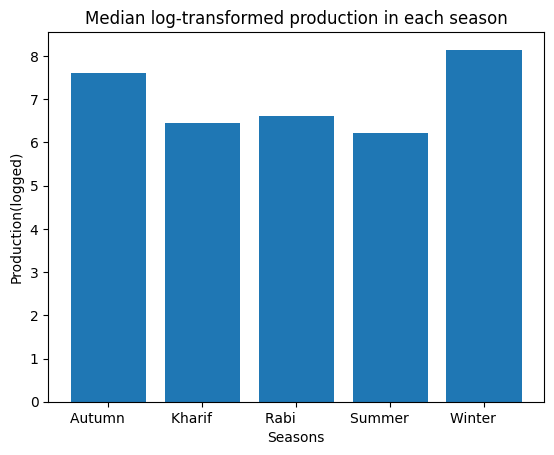

In [27]:
median_values = crop_data.groupby("Season").median()
median_values = median_values.reset_index().drop(4)

plt.bar(median_values['Season'], median_values['Production'])
plt.xlabel('Seasons')
plt.ylabel('Production(logged)')
plt.title('Median log-transformed production in each season')
plt.show()

### Visualization of the distribution of years in the data

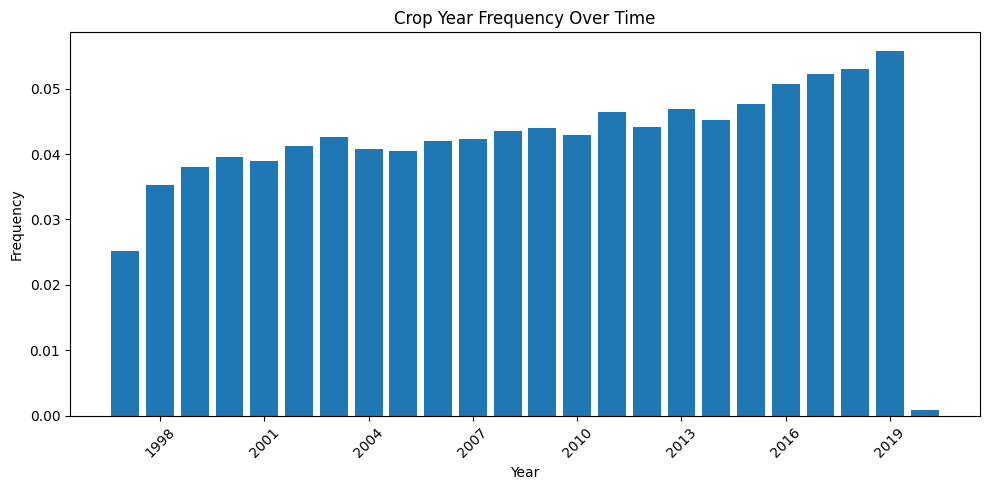

In [28]:
year_counts = crop_data['Crop_Year'].value_counts().sort_index()
years = np.array(year_counts.index.tolist())
frequencies = year_counts.values/crop_data.shape[0]
plt.figure(figsize=(10, 5))

plt.bar(years, frequencies)
plt.title('Crop Year Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
locator = ticker.MaxNLocator(nbins=10)
plt.gca().xaxis.set_major_locator(locator)

plt.tight_layout() 
plt.show()

In [29]:
preprocessed_crop_data.to_csv('preprocessed_crop_data.csv')